Importing libraries...
✓ Libraries imported
✓ Feature extraction function defined
Data directory: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ
Output file: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\audio_features.csv
Output directory exists: True

Found 26 sessions to process:
  - 300_P
  - 301_P
  - 302_P
  - 303_P
  - 304_P
  - 305_P
  - 306_P
  - 307_P
  - 308_P
  - 309_P
  - 310_P
  - 311_P
  - 312_P
  - 313_P
  - 314_P
  - 315_P
  - 316_P
  - 317_P
  - 318_P
  - 319_P
  - 320_P
  - 321_P
  - 322_P
  - 323_P
  - 324_P
  - 325_P

PROCESSING ALL SESSIONS
This will take 10-20 minutes. Please wait...



Processing sessions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [02:16<00:00,  5.23s/it]


✓ Processed 26 sessions successfully

DataFrame created:
  Shape: (26, 69)
  Columns: 69


,mfcc_0_mean,mfcc_0_std,mfcc_0_min,mfcc_0_max,mfcc_1_mean,mfcc_1_std,mfcc_1_min,mfcc_1_max,mfcc_2_mean,mfcc_2_std,...,energy_min,energy_max,spectral_centroid_mean,spectral_centroid_std,zcr_mean,zcr_std,spectral_rolloff_mean,spectral_rolloff_std,duration_seconds,session_id
0,-420.819550,115.960236,-533.960205,38.518696,72.460968,23.114119,-3.310400,196.609772,16.553358,16.415039,...,0.000972,0.180119,1912.867520,480.655057,0.091788,0.044423,4462.484503,1109.922378,648.5,300
1,-432.165375,83.099236,-542.923401,-53.214401,104.369667,40.383564,-46.096001,225.267242,6.225253,29.720949,...,0.000915,0.092895,1481.119401,674.339885,0.075145,0.069432,3303.742608,1487.751854,823.9,301
2,-482.044525,54.165043,-573.791443,-147.068817,87.291069,22.382608,-9.470585,178.628036,14.174647,14.310090,...,0.000614,0.071780,1556.463782,383.510157,0.062966,0.032769,3784.574917,967.459433,758.8,302
3,-446.667999,73.032578,-561.759521,-125.475212,103.839577,32.357883,-48.546219,206.116180,4.523046,29.001995,...,0.000952,0.073801,1415.903169,549.802868,0.072012,0.048504,3101.238745,1348.412328,985.3,303
4,-475.077301,62.537453,-555.437988,-180.653290,98.860138,24.145567,-0.249822,197.400681,8.205424,26.920105,...,0.000898,0.101635,1319.321548,302.173454,0.059752,0.028114,2979.814738,948.959774,792.6,304



✓ Features saved to: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\audio_features.csv
  File size: 19.46 KB

Verification - Loaded saved file:
  Shape: (26, 69)
  Sessions: 300 to 325


,session_id,mfcc_0_mean,pitch_mean,energy_mean
0,300,-420.81955,143.50816,0.010082
1,301,-432.16537,138.14612,0.009363
2,302,-482.04453,110.91625,0.003494
3,303,-446.66800,177.02500,0.007851
4,304,-475.07730,163.80588,0.005304
5,305,-280.03577,188.27061,0.050303
6,306,-297.47717,213.03352,0.031421
7,307,-254.15625,234.17906,0.065470
8,308,-334.05250,188.06345,0.022620
9,309,-543.26434,128.65524,0.006961



FEATURE STATISTICS


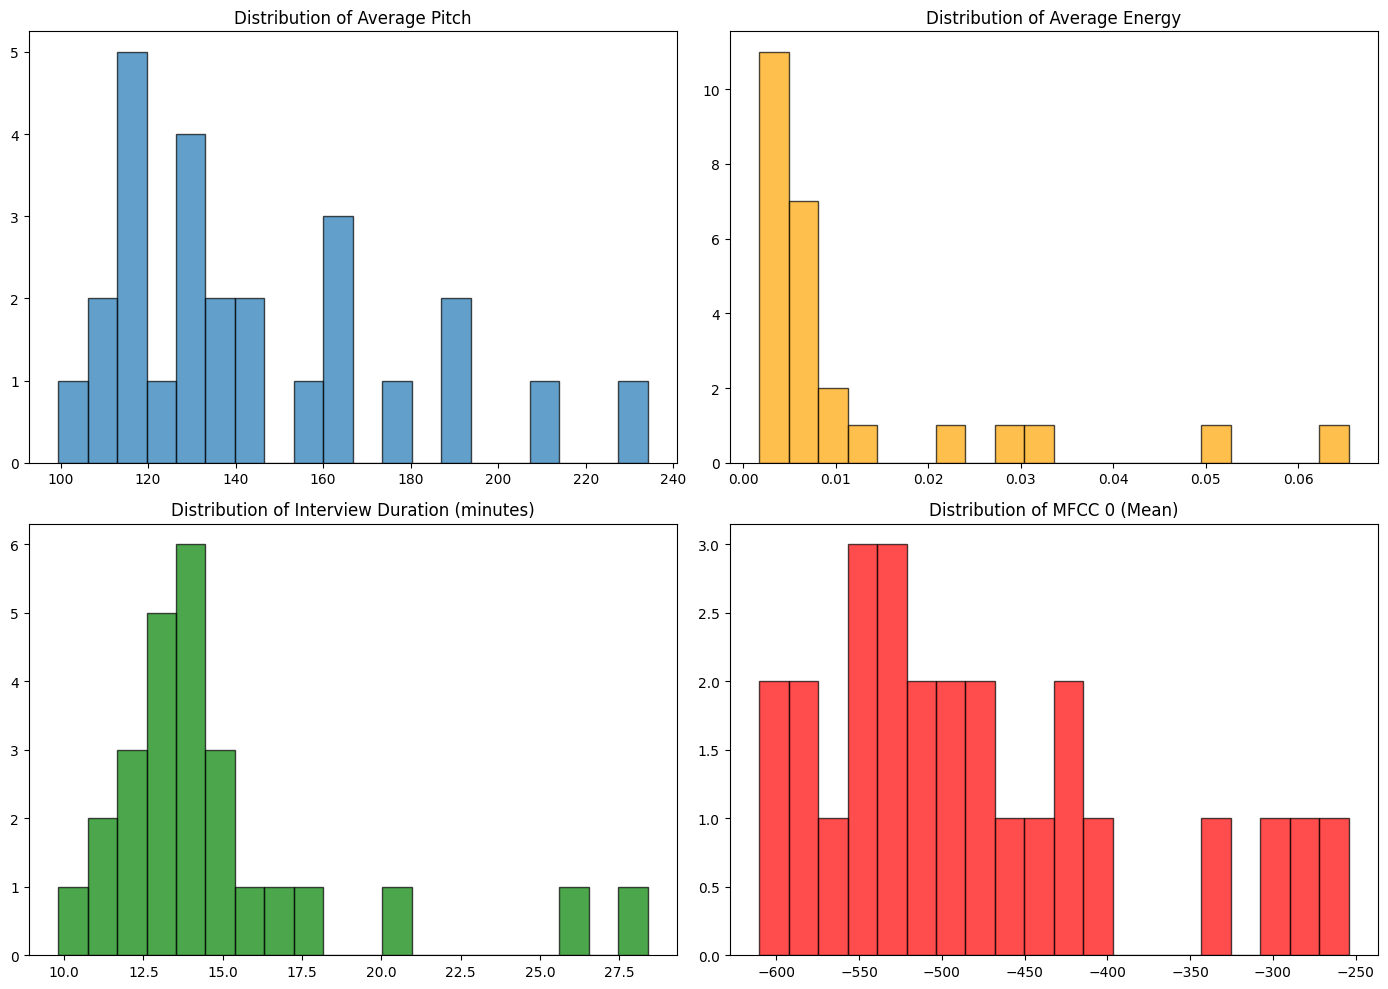


Summary Statistics:
       pitch_mean  energy_mean  duration_seconds
count   26.000000    26.000000         26.000000
mean   144.012970     0.011620        890.953846
std     33.866364     0.015818        253.322108
min     99.424973     0.001711        588.400000
25%    118.331516     0.003367        765.500000
50%    135.010849     0.005478        830.450000
75%    162.184875     0.009903        873.500000
max    234.179062     0.065470       1704.000000

✅ AUDIO FEATURE EXTRACTION COMPLETE!

📊 Results:
  - Processed: 26 sessions
  - Features per session: 68
  - Output file: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\audio_features.csv
  - File size: 19.46 KB

📋 Feature breakdown:
  - MFCC features: 52 (13 coefficients × 4 stats)
  - Pitch features: 5
  - Energy features: 4
  - Spectral features: 6
  - Duration: 1
  - Total: 68

✅ Next step: Run Notebook 3 to extract text features


In [4]:
# ============================================================
# NOTEBOOK 2: Extract Audio Features from ALL Sessions (300-325)
# ============================================================

# SAVE AS: notebooks/exploratory/05_extract_audio_features.ipynb
# This processes all 26 sessions (300_P–325_P)
# Extracts MFCCs, pitch, energy, spectral features
# Saves to: data/features/audio_features.csv
# TIME: ~10–20 minutes depending on your PC
# ============================================================


# ========== CELL 1: Import Libraries ==========
print("Importing libraries...")

import pandas as pd
import numpy as np
import librosa
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported")


# ========== CELL 2: Define Feature Extraction Function ==========

def extract_audio_features(audio_path, sample_rate=16000):
    """
    Extract comprehensive audio features from a single file.
    """
    try:
        # Load audio
        audio, sr = librosa.load(audio_path, sr=sample_rate)
        features = {}

        # === 1. MFCCs (13 coefficients) ===
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        for i in range(13):
            features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
            features[f'mfcc_{i}_std'] = np.std(mfccs[i])
            features[f'mfcc_{i}_min'] = np.min(mfccs[i])
            features[f'mfcc_{i}_max'] = np.max(mfccs[i])

        # === 2. Pitch ===
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, fmin=50, fmax=400)
        pitch_values = []
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch > 0:
                pitch_values.append(pitch)
        if len(pitch_values) > 0:
            pitch_values = np.array(pitch_values)
            features['pitch_mean'] = np.mean(pitch_values)
            features['pitch_std'] = np.std(pitch_values)
            features['pitch_min'] = np.min(pitch_values)
            features['pitch_max'] = np.max(pitch_values)
            features['pitch_range'] = np.max(pitch_values) - np.min(pitch_values)
        else:
            for k in ['mean','std','min','max','range']:
                features[f'pitch_{k}'] = 0

        # === 3. Energy ===
        rms = librosa.feature.rms(y=audio)[0]
        features['energy_mean'] = np.mean(rms)
        features['energy_std'] = np.std(rms)
        features['energy_min'] = np.min(rms)
        features['energy_max'] = np.max(rms)

        # === 4. Spectral Features ===
        spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
        features['spectral_centroid_mean'] = np.mean(spectral_centroids)
        features['spectral_centroid_std'] = np.std(spectral_centroids)

        zcr = librosa.feature.zero_crossing_rate(audio)[0]
        features['zcr_mean'] = np.mean(zcr)
        features['zcr_std'] = np.std(zcr)

        rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
        features['spectral_rolloff_mean'] = np.mean(rolloff)
        features['spectral_rolloff_std'] = np.std(rolloff)

        # === 5. Duration ===
        features['duration_seconds'] = len(audio) / sr

        return features

    except Exception as e:
        print(f"  ❌ Error extracting {audio_path.name}: {e}")
        return None

print("✓ Feature extraction function defined")


# ========== CELL 3: Set Paths ==========

DATA_DIR = Path(r'C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ')
OUTPUT_FILE = Path(r'C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\features\audio_features.csv')
OUTPUT_FILE.parent.mkdir(parents=True, exist_ok=True)

print(f"Data directory: {DATA_DIR}")
print(f"Output file: {OUTPUT_FILE}")
print(f"Output directory exists: {OUTPUT_FILE.parent.exists()}")


# ========== CELL 4: Find All Sessions ==========

session_dirs = sorted([d for d in DATA_DIR.iterdir() if d.is_dir() and d.name.endswith('_P')])
session_dirs = [d for d in session_dirs if 300 <= int(d.name.replace('_P', '')) <= 325]

print(f"\nFound {len(session_dirs)} sessions to process:")
for d in session_dirs:
    print(f"  - {d.name}")


# ========== CELL 5: Process All Sessions ==========

print("\n" + "="*60)
print("PROCESSING ALL SESSIONS")
print("="*60)
print("This will take 10-20 minutes. Please wait...\n")

all_features = []

for session_dir in tqdm(session_dirs, desc="Processing sessions"):
    session_id = session_dir.name.replace('_P', '')

    # === Detect audio file dynamically ===
    audio_file = None
    for ext in ['.wav', '.flac', '.mp3']:
        f = session_dir / f"{session_id}_AUDIO{ext}"
        if f.exists():
            audio_file = f
            break

    if not audio_file:
        print(f"\n⚠ Audio file not found for session {session_id}")
        continue

    features = extract_audio_features(audio_file)
    if features:
        features['session_id'] = int(session_id)
        all_features.append(features)

print(f"\n✓ Processed {len(all_features)} sessions successfully")


# ========== CELL 6: Create DataFrame and Save ==========

if len(all_features) == 0:
    raise ValueError("No audio files processed — please check audio file paths or extensions.")

df = pd.DataFrame(all_features)
df = df.sort_values('session_id').reset_index(drop=True)

print(f"\nDataFrame created:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {len(df.columns)}")

display(df.head())

df.to_csv(OUTPUT_FILE, index=False)
print(f"\n✓ Features saved to: {OUTPUT_FILE}")
print(f"  File size: {OUTPUT_FILE.stat().st_size / 1024:.2f} KB")


# ========== CELL 7: Verify Saved File ==========

df_loaded = pd.read_csv(OUTPUT_FILE)
print(f"\nVerification - Loaded saved file:")
print(f"  Shape: {df_loaded.shape}")
print(f"  Sessions: {df_loaded['session_id'].min()} to {df_loaded['session_id'].max()}")
display(df_loaded[['session_id', 'mfcc_0_mean', 'pitch_mean', 'energy_mean']].head(10))


# ========== CELL 8: Basic Statistics ==========

import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("FEATURE STATISTICS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['pitch_mean'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Average Pitch')

axes[0, 1].hist(df['energy_mean'], bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Average Energy')

axes[1, 0].hist(df['duration_seconds']/60, bins=20, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Distribution of Interview Duration (minutes)')

axes[1, 1].hist(df['mfcc_0_mean'], bins=20, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('Distribution of MFCC 0 (Mean)')

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print(df[['pitch_mean', 'energy_mean', 'duration_seconds']].describe())


# ========== CELL 9: Final Summary ==========

print("\n" + "="*60)
print("✅ AUDIO FEATURE EXTRACTION COMPLETE!")
print("="*60)
print(f"\n📊 Results:")
print(f"  - Processed: {len(df)} sessions")
print(f"  - Features per session: {len(df.columns) - 1}")
print(f"  - Output file: {OUTPUT_FILE}")
print(f"  - File size: {OUTPUT_FILE.stat().st_size / 1024:.2f} KB")

print(f"\n📋 Feature breakdown:")
print(f"  - MFCC features: 52 (13 coefficients × 4 stats)")
print(f"  - Pitch features: 5")
print(f"  - Energy features: 4")
print(f"  - Spectral features: 6")
print(f"  - Duration: 1")
print(f"  - Total: {len(df.columns) - 1}")

print(f"\n✅ Next step: Run Notebook 3 to extract text features")
print("="*60)
